In [1]:
# 필요한 라이브러리 임포트

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score, roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 데이터 로드

wine = datasets.load_wine()

X = wine.data[:, :2] # alcohol, malic_acid
y = wine.target

# 1. train_test_split (10점)
train : test = 8 : 2  
random_state 값 : 42

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# 2. Multiclass Classification
### Default Model Performance
1. LogisticRegression() Test Accuracy : 0.7778  
2. GaussianNB() Test Accuracy : 0.8056  
3. MultinomialNB() Test Accuracy : 0.4167  
4. KNeighborsClassifier() Test Accuracy : 0.8333

### 파라미터를 변경하여 4가지 모델 중 3개 이상 성능 향상시키기 (개당 10점, 최대 30점)
1. test accuracy 구하고, decision boundary 그리기  
2. prediction 값을 구하고, classification_report로 f1_score 구하기
3. confusion_matrix 출력

In [4]:
# 2.

# Logistic Regression (C값 조절 가능)

lr = LogisticRegression(penalty = 'l2', dual = False, tol = 0.0001, C = 1.0, fit_intercept = True,
                        intercept_scaling = 1, class_weight = None, random_state = None, solver = 'lbfgs', max_iter = 100,
                        multi_class = 'auto', verbose = 0, warm_start = False, n_jobs = None, l1_ratio = None)

# Gaussian Naive Bayes

gnb = GaussianNB(priors = None, var_smoothing = 1e-09)

# Multinomial Naive Bayes

mnb = MultinomialNB(alpha = 1.0, force_alpha = 'warn', fit_prior = True, class_prior = None)

# K-Nearest Neighbors

knn = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', algorithm = 'auto', leaf_size = 30,
                           p = 2, metric = 'minkowski', metric_params = None, n_jobs = None)

In [5]:
# C값, alpha값, n_neighbors값을 변경하여 최적의 성능을 내는 모델을 찾아보자

# C값 변경
C_list = [0.1, 1, 10, 100, 1000]
for C in C_list:
    clf = LogisticRegression(penalty = 'l2', dual = False, tol = 0.0001, C = C, fit_intercept = True,
                        intercept_scaling = 1, class_weight = None, random_state = 42, solver = 'lbfgs', max_iter = 100,
                        multi_class = 'auto', verbose = 0, warm_start = False, n_jobs = None, l1_ratio = None)
    clf.fit(X_train, y_train)
    print(f"C = {C}, Test Accuracy: {clf.score(X_test, y_test):.4f}")
    
# alpha값 변경
alpha_list = [0.1, 1, 10, 100, 1000]
for alpha in alpha_list:
    mnb = MultinomialNB(alpha = alpha, force_alpha = 'warn', fit_prior = True, class_prior = None)
    mnb.fit(X_train, y_train)
    print(f"alpha = {alpha}, Test Accuracy: {mnb.score(X_test, y_test):.4f}")
    
# n_neighbors값 변경
n_neighbors_list = [1, 10, 20, 30, 40, 50]
for n_neighbors in n_neighbors_list:
    knn = KNeighborsClassifier(n_neighbors = n_neighbors, weights = 'uniform', algorithm = 'auto', leaf_size = 30,
                            p = 2, metric = 'minkowski', metric_params = None, n_jobs = None)
    knn.fit(X_train, y_train)
    print(f"n_neighbors = {n_neighbors}, Test Accuracy: {knn.score(X_test, y_test):.4f}")

C = 0.1, Test Accuracy: 0.7778
C = 1, Test Accuracy: 0.7778
C = 10, Test Accuracy: 0.8056
C = 100, Test Accuracy: 0.8056
C = 1000, Test Accuracy: 0.8056
alpha = 0.1, Test Accuracy: 0.4167
alpha = 1, Test Accuracy: 0.4167
alpha = 10, Test Accuracy: 0.4444
alpha = 100, Test Accuracy: 0.3889
alpha = 1000, Test Accuracy: 0.3889
n_neighbors = 1, Test Accuracy: 0.8056
n_neighbors = 10, Test Accuracy: 0.8889
n_neighbors = 20, Test Accuracy: 0.8333
n_neighbors = 30, Test Accuracy: 0.7778
n_neighbors = 40, Test Accuracy: 0.8056
n_neighbors = 50, Test Accuracy: 0.7778


C = 10, Test Accuracy: 0.8056  
alpha = 10, Test Accuracy: 0.4444  
n_neighbors = 10, Test Accuracy: 0.8889

# 3. KNN
### k값을 변화시키면서, 각각의 plot 그리기, Accuracy 값 출력 (20점)

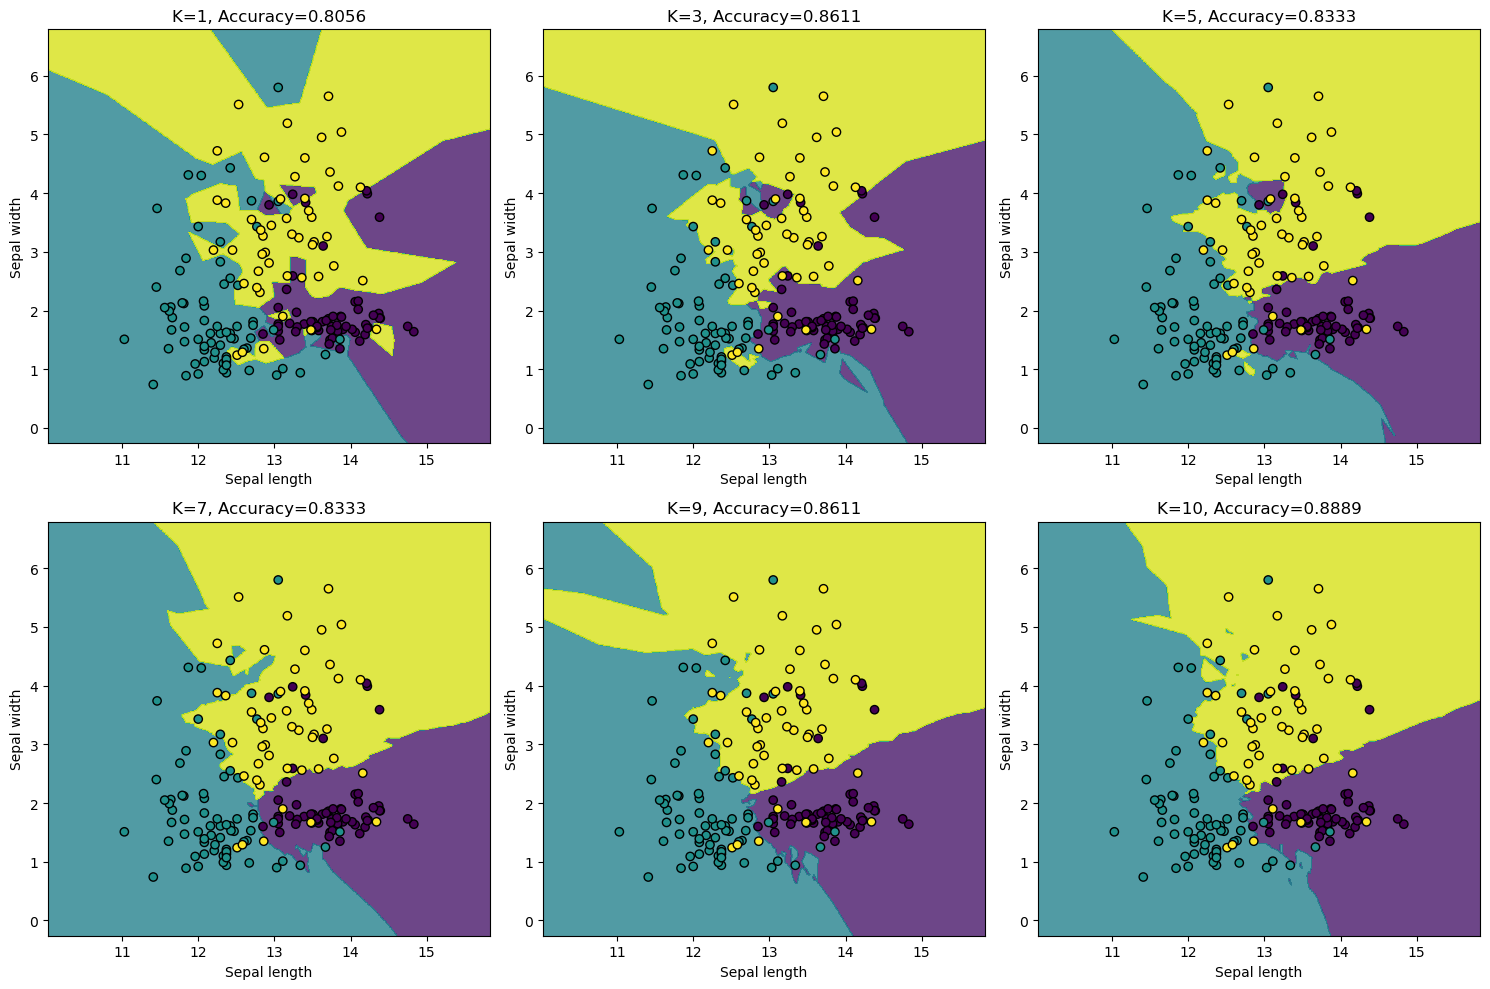

In [6]:
# 3. 
k_values = [1, 3, 5, 7, 9, 10]  # 다양한 k 값을 사용하여 실험
plt.figure(figsize=(15, 10))

for i, k in enumerate(k_values, 1):
    # KNN 모델 학습
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Test set에 대한 Accuracy 계산
    accuracy = knn.score(X_test, y_test)
    
    # Decision boundary 시각화
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                        np.arange(y_min, y_max, 0.01))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(2, 3, i)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title(f"K={k}, Accuracy={accuracy:.4f}")

plt.tight_layout()
plt.show()

# 4. SVM
### SVM 기본 모델과, 수업시간에 배운 여러 종류의 SVM을 사용해보기 (개당 10점, 최대 30점)
1. test accuracy 구하고, decision boundary 그리기  
2. prediction 값을 구하고, classification_report로 f1_score 구하기
3. confusion_matrix 출력

In [7]:
# 4-1. test accuracy
clf_linear = SVC(kernel='linear', C=1e5)  # Linear SVM
clf_soft_margin = SVC(kernel='linear', C=0.1)  # Soft Margin SVM
clf_rbf = SVC(kernel='rbf', gamma=0.7, C=1e5)  # Kernel SVM
clf_linear.fit(X, y)
clf_soft_margin.fit(X, y)
clf_rbf.fit(X, y)

# test accuracy
print(f"Linear SVM Test Accuracy: {clf_linear.score(X_test, y_test):.4f}")
print(f"Soft Margin SVM Test Accuracy: {clf_soft_margin.score(X_test, y_test):.4f}")
print(f"Kernel SVM Test Accuracy: {clf_rbf.score(X_test, y_test):.4f}")

Linear SVM Test Accuracy: 0.8333
Soft Margin SVM Test Accuracy: 0.7778
Kernel SVM Test Accuracy: 0.9722


In [8]:
# 4-2. prediction 값을 구하고, classification report를 출력하여 f-1 score 구하기
y_pred_linear = clf_linear.predict(X_test)
y_pred_soft_margin = clf_soft_margin.predict(X_test)
y_pred_rbf = clf_rbf.predict(X_test)

print("Linear SVM")
print(classification_report(y_test, y_pred_linear))
print("Soft Margin SVM")
print(classification_report(y_test, y_pred_soft_margin))
print("Kernel SVM")
print(classification_report(y_test, y_pred_rbf))

Linear SVM
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.92      0.86      0.89        14
           2       0.71      0.62      0.67         8

    accuracy                           0.83        36
   macro avg       0.82      0.80      0.81        36
weighted avg       0.83      0.83      0.83        36

Soft Margin SVM
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.92      0.86      0.89        14
           2       0.56      0.62      0.59         8

    accuracy                           0.78        36
   macro avg       0.75      0.76      0.75        36
weighted avg       0.79      0.78      0.78        36

Kernel SVM
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      1.00      1.00        14
           2       1.00      0.88    

In [9]:
# 4-3. confusion matrix를 출력
print("Soft Margin SVM Confusion Matrix")
print(confusion_matrix(y_test, y_pred_linear))

print("Kernel SVM Confusion Matrix")
print(confusion_matrix(y_test, y_pred_soft_margin))

print("Linear SVM Confusion Matrix")
print(confusion_matrix(y_test, y_pred_rbf))

Soft Margin SVM Confusion Matrix
[[13  0  1]
 [ 1 12  1]
 [ 2  1  5]]
Kernel SVM Confusion Matrix
[[11  0  3]
 [ 1 12  1]
 [ 2  1  5]]
Linear SVM Confusion Matrix
[[14  0  0]
 [ 0 14  0]
 [ 1  0  7]]


# 5. 시간 내 제출 (10점)